## **Лабораторная работа №1 по курсу "Нейроинформатика"**

### Персептроны. Процедура обучения Розенблатта

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

#### Вариант 10

In [1]:
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import random

### Часть 1

In [2]:
# обучающая выборка
X1 = np.array([(3,2.4), (-3.8,0.2), (-1.8,0.4), (-1.1,-0.9), (-3.2,-2.5), (-4.8,4.2)])
Y1 = np.array([0, 1, 1, 1, 1, 0])

In [3]:
# модель
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(1, input_dim=2, activation='sigmoid',
                                 kernel_initializer=keras.initializers.RandomNormal(stddev=0.5,mean=0.0),
                                 bias_initializer=keras.initializers.Zeros()))
model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [4]:
# обучение модели
train_info1 = model1.fit(X1, Y1, batch_size=1, epochs=500, verbose=0)

Посмотрим график лосса

In [5]:
# функция построения графика
def create_plot(train_info, metric):
    plt.figure(figsize=(7,7))
    history = train_info.history[metric]
    plt.plot(range(1, len(history) + 1), history)
    plt.grid()
    plt.show()

### Loss

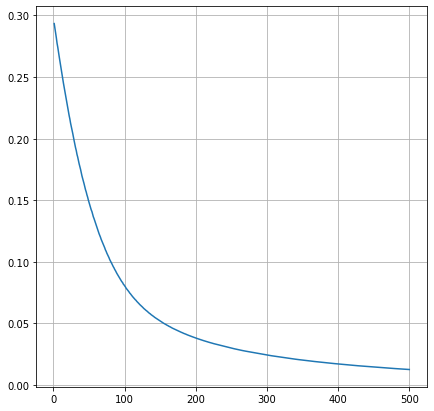

In [6]:
create_plot(train_info1, 'loss')

По графику видно, что персептрон учится, так как лосс падает.

In [7]:
# проверка качества обучения

def generate_array(n):
    array = []
    for _ in range(n):
        x = round(random.randint(-5, 3) * random.random(), 1)
        y = round(random.randint(-5, 3) * random.random(), 1)
        array.append((x, y))
    array = np.array(array)
    return array

X_test1 = generate_array(3)
print(X_test1)

pred1 =  model1.predict(X_test1).tolist()
pred1 = [round(x[0], 0) for x in pred1]
print(pred1)

[[-0.4  0.6]
 [-0.9 -2.9]
 [-1.9 -1.7]]
[1.0, 1.0, 1.0]


Построим график. Отметим случайно сгенерированные точки бОльшим размером.

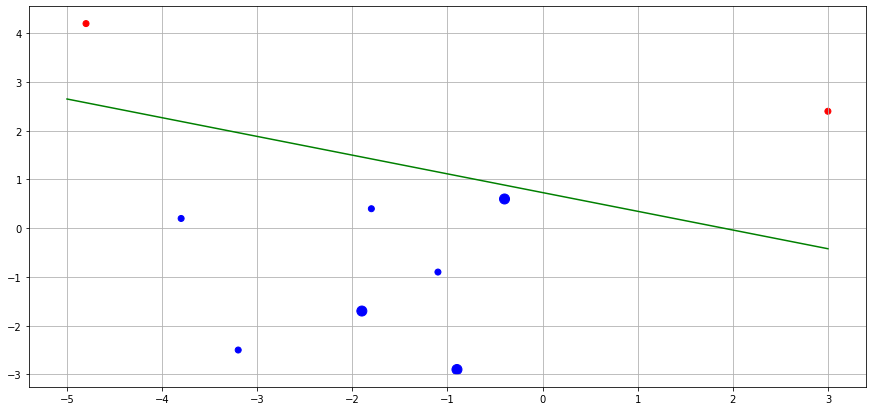

In [8]:
# график
A1, b1 = model1.layers[0].get_weights()
plt.figure(figsize=[15,7])
colors = ['r' if label == 0 else 'b' for label in Y1]
colors_test = ['r' if label == 0 else 'b' for label in pred1]
plt.scatter(X1[:,0], X1[:,1], color=colors)
plt.scatter(X_test1[:,0], X_test1[:,1], color=colors_test, s=100)
x_disc1 = np.linspace(-5, 3, 10)
plt.plot(x_disc1, (-A1[0] * x_disc1 - b1) / A1[1], 'g')
plt.grid()
plt.show()

Как видно из графики, модель правильно классифицировала случайно сгенерированные точки.

### Часть 2

In [9]:
# обучающая выборка
X2 = np.array([(2,-1.3), (2.3,4.5), (0.4,0.4), (-1.9,-4.3), (-3.2,-4.1), (-0.4,-5), (4.1,1.4), (-5,-4.7)])
Y2 = np.array([(0,1), (0,0), (0,0), (1,0), (1,0), (1,1), (0,1), (1,0)])

In [10]:
# модель
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(2, input_dim=2, activation='sigmoid',
                                 kernel_initializer=keras.initializers.RandomNormal(stddev=0.5,mean=0.0),
                                 bias_initializer=keras.initializers.Zeros()))
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [11]:
# обучение модели
train_info2 = model2.fit(X2, Y2, batch_size=1, epochs=500, verbose=0)

Построим график лосса.

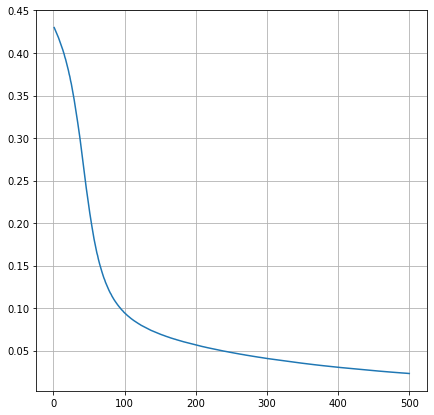

In [12]:
create_plot(train_info2, 'loss')

График лосса падает, следовательно, персептрон учится.

In [13]:
# проверка качества обучения
X_test2 = generate_array(3)
print(X_test2)

pred2 =  model2.predict(X_test2).tolist()
pred2 = [(round(x[0], 0), round(x[1], 0)) for x in pred2]
print(pred2)

[[ 0.   0.5]
 [-0.7 -0.9]
 [ 1.  -0.1]]
[(0.0, 0.0), (1.0, 0.0), (0.0, 0.0)]


In [14]:
def create_colors(array):
    colors = []
    for label in array:
        if label[0] == 0:
            if label[1] == 0:
                colors.append('b')
            else:
                colors.append('r')
        elif label[0] == 1:
            if label[1] == 0:
                colors.append('c')
            else:
                colors.append('m')
    return colors

colors2 = create_colors(Y2)
colors_test2 = create_colors(pred2)

Построим график. Отметим случайно сгенерированные точки бОльшим размером.

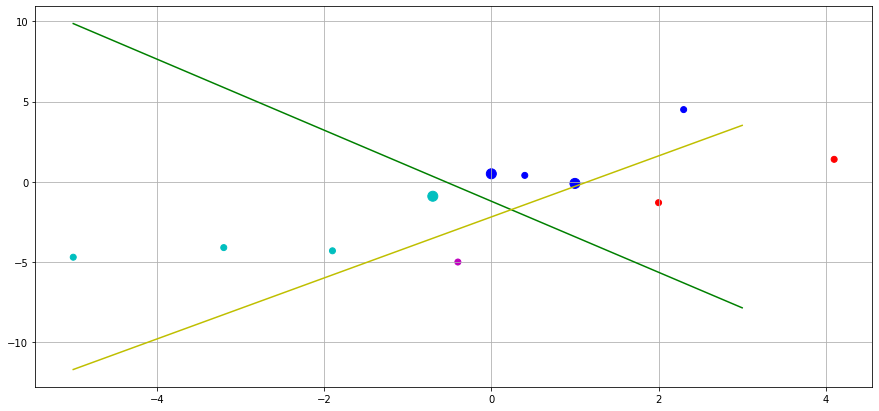

In [15]:
# график
A2, b2 = model2.layers[0].get_weights()
plt.figure(figsize=[15,7])
plt.scatter(X2[:,0], X2[:,1], color=colors2)
plt.scatter(X_test2[:,0], X_test2[:,1], color=colors_test2, s=100)
x_disc2 = np.linspace(-5, 3, 10)
plt.plot(x_disc2, (-A2[0][0] * x_disc2 - b2[0]) / A2[1][0], 'g')
plt.plot(x_disc2, (-A2[0][1] * x_disc2 - b2[1]) / A2[1][1], 'y')
plt.grid()
plt.show()

Из графика видно, что с задачей классификации 4 классов наш персептрон успешно справился.

### Выводы
В ходе данной лабораторной работы построил и обучил персептрон Розенблатта, который на практике может применяться для решения задачи распознавания образов. Построенная модель была протестирована на случайных данных и корректно классифицировала их для случаев 2 и 4 классов.

Однако ввиду небольшого объёма обучающей выборке (6 и 8 точек для решения задачи с 2-мя и 4-мя классами соответственно) наши модели могут ошибаться.